# 🏠 Regression Modeling - Baseline (No Outlier Treatment, No Scaling)
This notebook builds multiple regression models on the `House_data.csv` dataset.
- No outlier treatment
- No feature scaling
- Includes EDA, model training, evaluation
- Models stored in a dictionary and compared using multiple metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load Dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Python\Nareshit data analysis\stats and ML\ML\26th- mlr\MLR\House_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Basic Info and Nulls
df.info()

# Check for nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Assuming last column is target (DV) for this dataset
df.drop(columns=['id','date'],axis=1,inplace=True)
DV = df.columns[0]
DV

'price'

In [5]:
# Define features and target
X = df.drop(DV, axis=1)
y = df[DV]
X.shape, y.shape

((21613, 18), (21613,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Dictionary of models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}

# Add polynomial regression separately
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
models['Polynomial'] = LinearRegression().fit(X_poly, y_train)

In [8]:
results = {}

for name, model in models.items():
    if name == 'Polynomial':
        y_pred = model.predict(X_poly_test)
        bias_score = model.score(X_poly, y_train)
        variance_score = model.score(X_poly_test, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        bias = model.score(X_train, y_train)
        variance = model.score(X_test, y_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # bias = np.mean(y_pred - y_test)
    # variance = np.var(y_pred)
    

    results[name] = {
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Bias score': bias,
        'Variance score': variance
    }

result_df=pd.DataFrame(results).T.sort_values('R2', ascending=False)
result_df

,R2,RMSE,MAE,Bias score,Variance score
RandomForest,0.893070,112767.752822,64549.572476,0.982102,0.893070
Polynomial,0.781890,161054.573831,101209.907847,-0.058099,-0.048827
DecisionTree,0.759801,169013.197742,95096.290655,0.999251,0.759801
Ridge,0.695002,190451.262884,122167.364749,0.700533,0.695002
Lasso,0.694933,190472.704215,122186.780726,0.700535,0.694933
LinearRegression,0.694931,190473.375512,122187.775719,0.700535,0.694931
ElasticNet,0.615547,213824.208260,141338.447292,0.620770,0.615547
KNN,0.478375,249066.061306,156382.793662,0.686724,0.478375
SVR,-0.048827,353172.795763,215409.478394,-0.058099,-0.048827


In [9]:
# Predict + show actual vs predicted for top models
top_n = 2  # You can change to 1 or 3 as needed
top_models = result_df.head(top_n).index

for name in top_models:
    print(f"\n{name} - Actual vs Predicted Comparison:\n")

    if name == 'Polynomial':
        y_pred = models[name].predict(X_poly_test)
    else:
        y_pred = models[name].predict(X_test)

    actual = y_test.values.ravel()
    predicted = y_pred.ravel()

    test_pred = pd.DataFrame({
        'Actual price': actual,
        'Predicted price': predicted
    })
    test_pred['Error'] = test_pred['Actual price'] - test_pred['Predicted price']
    test_pred['Absolute Error'] = test_pred['Error'].abs()

    # Format: suppress scientific notation
    pd.set_option('display.float_format', '{:,.2f}'.format)

    print(test_pred.head())


RandomForest - Actual vs Predicted Comparison:

   Actual price  Predicted price       Error  Absolute Error
0    297,000.00       312,374.52  -15,374.52       15,374.52
1  1,578,000.00     1,685,139.90 -107,139.90      107,139.90
2    562,100.00       530,269.50   31,830.50       31,830.50
3    631,500.00       545,209.00   86,291.00       86,291.00
4    780,000.00       743,922.00   36,078.00       36,078.00

Polynomial - Actual vs Predicted Comparison:

   Actual price  Predicted price       Error  Absolute Error
0    297,000.00       426,464.73 -129,464.73      129,464.73
1  1,578,000.00     1,943,342.67 -365,342.67      365,342.67
2    562,100.00       546,106.08   15,993.92       15,993.92
3    631,500.00       550,797.49   80,702.51       80,702.51
4    780,000.00       879,077.11  -99,077.11       99,077.11


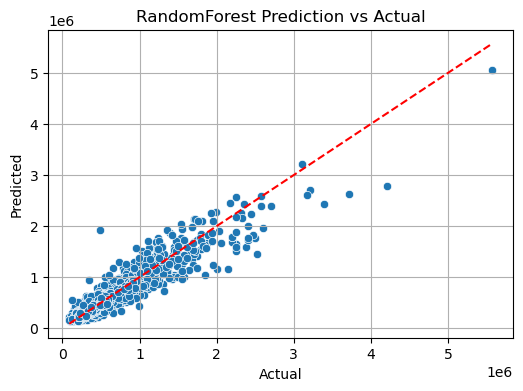

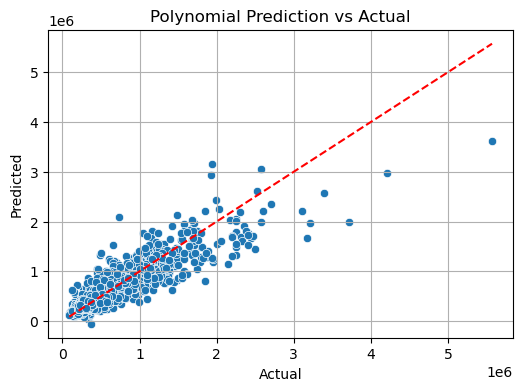

In [10]:
# Visualize predictions vs actuals for top 2 models
best_models = sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True)[:2]
for name, _ in best_models:
    if name == 'Polynomial':
        y_pred = models[name].predict(X_poly_test)
    else:
        y_pred = models[name].predict(X_test)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} Prediction vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.grid(True)
    plt.show()

In [16]:
import statsmodels.api as sm
# ----------- Step 1: Initial OLS with All Features ----------- #
X_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_const).fit()
print("\nInitial OLS Summary (All Features):\n")
print(ols_model.summary())

# ----------- Step 2: Feature Elimination using p-values ----------- #
significance_level = 0.05
selected_features = list(X_train.columns)

while True:
    X_const = sm.add_constant(X_train[selected_features])
    model = sm.OLS(y_train, X_const).fit()
    p_values = model.pvalues[1:]  # exclude intercept

    if p_values.max() > significance_level:
        worst_feature = p_values.idxmax()
        print(f"Removing feature: {worst_feature} with p-value {p_values[worst_feature]:.4f}")
        selected_features.remove(worst_feature)
    else:
        break

print("\nSelected Features after p-value based elimination:")
print(selected_features)

# ----------- Step 3: Fit LinearRegression on selected features ----------- #
lr_model = LinearRegression()
lr_model.fit(X_train[selected_features], y_train)

y_pred_all = ols_model.predict(sm.add_constant(X_test[X_train.columns]))
y_pred_selected = lr_model.predict(X_test[selected_features])

# ----------- Step 4: Compare Performance ----------- #
def evaluate_model(y_test, y_pred, X_train, y_train, X_test):
    return {
        'R2': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Bias score': lr_model.score(X_train, y_train),
        'Variance score': lr_model.score(X_test, y_test)
    }

results_ols_all = evaluate_model(y_test, y_pred_all, X_train[selected_features], y_train, X_test[selected_features])
results_ols_selected = evaluate_model(y_test, y_pred_selected, X_train[selected_features], y_train, X_test[selected_features])

print("\n📊 Performance Comparison:\n")
pd.set_option('display.float_format', '{:,.4f}'.format)
comparison_df = pd.DataFrame({
    'OLS (All Features)': results_ols_all,
    'LinearReg (Selected Features)': results_ols_selected
})
print(comparison_df)


Initial OLS Summary (All Features):

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2377.
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:44:36   Log-Likelihood:            -2.3590e+05
No. Observations:               17290   AIC:                         4.718e+05
Df Residuals:                   17272   BIC:                         4.720e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

In [17]:
# Add both OLS versions to main results dictionary
results["OLS_All_Features"] = results_ols_all
results["OLS_Selected_Features"] = results_ols_selected

# Now update the result DataFrame
result_df = pd.DataFrame(results).T.sort_values('R2', ascending=False)

# Display updated results with OLS included
display(result_df)

,R2,RMSE,MAE,Bias score,Variance score
RandomForest,0.8931,"112,767.7528","64,549.5725",0.9821,0.8931
Polynomial,0.7819,"161,054.5738","101,209.9078",-0.0581,-0.0488
DecisionTree,0.7598,"169,013.1977","95,096.2907",0.9993,0.7598
Ridge,0.6950,"190,451.2629","122,167.3647",0.7005,0.6950
Lasso,0.6949,"190,472.7042","122,186.7807",0.7005,0.6949
OLS_Selected_Features,0.6949,"190,473.0088","122,266.3609",0.7005,0.6949
OLS_All_Features,0.6949,"190,473.3755","122,187.7757",0.7005,0.6949
LinearRegression,0.6949,"190,473.3755","122,187.7757",0.7005,0.6949
ElasticNet,0.6155,"213,824.2083","141,338.4473",0.6208,0.6155
KNN,0.4784,"249,066.0613","156,382.7937",0.6867,0.4784
